# Import File and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import datetime as dt

In [3]:
# Read file in as Pandas dataframe

df = pd.read_csv('kc_house_data.csv')
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,lat,long,yrs_old,renovated,basement
0,221900.0,3,1.00,1.0,0.0,0.0,3,7,98178,47.5112,-122.257,59,0,0
1,538000.0,3,2.25,2.0,0.0,0.0,3,7,98125,47.7210,-122.319,63,1,1
2,180000.0,2,1.00,1.0,0.0,0.0,3,6,98028,47.7379,-122.233,82,1,0
3,604000.0,4,3.00,1.0,0.0,0.0,5,7,98136,47.5208,-122.393,49,0,1
4,510000.0,3,2.00,1.0,0.0,0.0,3,8,98074,47.6168,-122.045,28,0,0


# Feature Engineering

## Engineering Distance From City Using Haversine Package

In [4]:
from haversine import haversine

seattle = [47.6092, -122.3363]
bellevue = [47.61555, -122.20392]

In [5]:
haversine(seattle, bellevue, unit ='mi')

6.181695095872431

In [6]:
df['lat_long'] = tuple(zip(df.lat, df.long))

In [7]:
seattle_distances = []
for i in df['lat_long']:
    seattle_distances.append(haversine((seattle), (i), unit = 'mi'))
df['distance_from_seattle'] = pd.Series(seattle_distances)

bellevue_distances = []
for i in df['lat_long']:
    bellevue_distances.append(haversine((bellevue), (i), unit = 'mi'))
df['distance_from_bellevue'] = pd.Series(bellevue_distances)

In [11]:
df['distance_from_city'] = df[['distance_from_bellevue', 'distance_from_seattle']].min(axis = 1)

In [12]:
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,lat,long,yrs_old,renovated,basement,lat_long,distance_from_seattle,distance_from_bellevue,distance_from_city
0,221900.0,3,1.00,1.0,0.0,0.0,3,7,98178,47.5112,-122.257,59,0,0,"(47.5112, -122.257)",7.714868,7.622786,7.622786
1,538000.0,3,2.25,2.0,0.0,0.0,3,7,98125,47.7210,-122.319,63,1,1,"(47.721, -122.319)",7.766476,9.041882,7.766476
2,180000.0,2,1.00,1.0,0.0,0.0,3,6,98028,47.7379,-122.233,82,1,0,"(47.7379, -122.233)",10.107949,8.561145,8.561145
3,604000.0,4,3.00,1.0,0.0,0.0,5,7,98136,47.5208,-122.393,49,0,1,"(47.5208, -122.393)",6.655340,10.979730,6.655340
4,510000.0,3,2.00,1.0,0.0,0.0,3,8,98074,47.6168,-122.045,28,0,0,"(47.6168, -122.045)",13.578402,7.402273,7.402273


In [14]:
df.corr()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,lat,long,yrs_old,renovated,basement,distance_from_seattle,distance_from_bellevue,distance_from_city
price,1.000000,0.294976,0.439504,0.269824,0.051723,0.213763,0.033555,0.617462,-0.019247,0.440473,0.078071,-0.058132,0.026075,0.153809,-0.307902,-0.462082,-0.446676
bedrooms,0.294976,1.000000,0.502797,0.158200,-0.027220,0.031555,0.021588,0.324725,-0.155763,-0.037402,0.147583,-0.167699,-0.013131,0.144714,0.105767,-0.004032,0.051430
bathrooms,0.439504,0.502797,1.000000,0.502804,-0.006341,0.083248,-0.139661,0.605862,-0.211804,-0.017073,0.250998,-0.550020,-0.005098,0.128288,0.156921,0.023005,0.069663
floors,0.269824,0.158200,0.502804,1.000000,-0.006636,-0.017506,-0.278456,0.457189,-0.066824,0.032931,0.137061,-0.514505,-0.009991,-0.277246,0.031458,-0.006902,-0.011964
waterfront,0.051723,-0.027220,-0.006341,-0.006636,1.000000,0.281882,0.011955,-0.013080,0.043173,-0.041656,-0.055325,0.034909,0.018781,0.017381,0.008403,0.034691,0.021955
view,0.213763,0.031555,0.083248,-0.017506,0.281882,1.000000,0.030584,0.117107,0.101453,-0.032666,-0.076513,0.068165,0.024561,0.133313,-0.029199,0.021031,-0.007470
condition,0.033555,0.021588,-0.139661,-0.278456,0.011955,0.030584,1.000000,-0.174163,-0.007494,-0.019510,-0.097492,0.350205,-0.026069,0.122920,-0.061314,-0.036981,-0.041559
grade,0.617462,0.324725,0.605862,0.457189,-0.013080,0.117107,-0.174163,1.000000,-0.189024,0.077229,0.233941,-0.498678,-0.017407,0.000241,0.089160,-0.068799,-0.023519
zipcode,-0.019247,-0.155763,-0.211804,-0.066824,0.043173,0.101453,-0.007494,-0.189024,1.000000,0.278346,-0.562647,0.343664,0.036237,0.163458,-0.551718,-0.256488,-0.388618
lat,0.440473,-0.037402,-0.017073,0.032931,-0.041656,-0.032666,-0.019510,0.077229,0.278346,1.000000,-0.132454,0.156935,0.020946,0.125287,-0.609682,-0.716060,-0.703719


In [15]:
df.drop(['lat', 'long', 'lat_long', 'distance_from_seattle', 'distance_from_bellevue'], axis = 1, inplace = True)

In [16]:
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,yrs_old,renovated,basement,distance_from_city
0,221900.0,3,1.00,1.0,0.0,0.0,3,7,98178,59,0,0,7.622786
1,538000.0,3,2.25,2.0,0.0,0.0,3,7,98125,63,1,1,7.766476
2,180000.0,2,1.00,1.0,0.0,0.0,3,6,98028,82,1,0,8.561145
3,604000.0,4,3.00,1.0,0.0,0.0,5,7,98136,49,0,1,6.655340
4,510000.0,3,2.00,1.0,0.0,0.0,3,8,98074,28,0,0,7.402273


In [17]:
df['distance_from_city'] = df['distance_from_city'].fillna(df['distance_from_city'].mode()[0])

## Bin Zip Codes into School Districts

In [18]:
df['zipcode'].nunique()

70

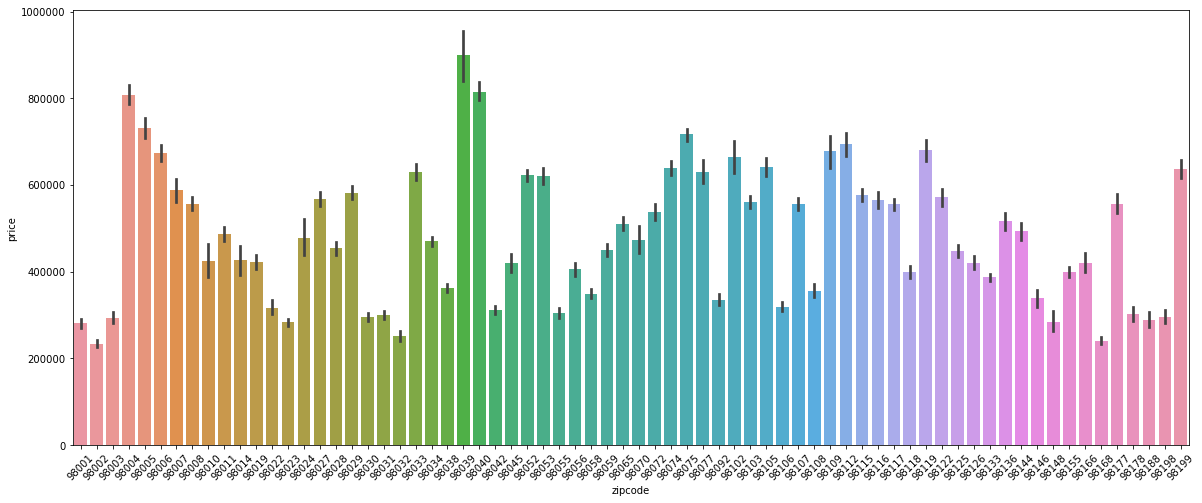

In [19]:
plt.figure(figsize=(20,8))
zc = sns.barplot(x = 'zipcode', y ='price', data = df)
for item in zc.get_xticklabels():
    item.set_rotation(45)

In [20]:
def group_zips(z):
    if z in [98177, 98133, 98125, 98155]:
        return 'Shoreline'
    
    elif z in [98028, 98011, 98072, 98077]:
        return 'Northshore'
    
    elif z in [98019, 98014]:
        return 'Riverview'
    
    elif z in [98117, 98103, 98115, 98107, 98105, 98199, 98119, 98109, 98102, 
               98112, 98122, 98116, 98136, 98126,
               98106, 98144, 98108, 98118]:
        return 'Seattle'
    
    elif z in [98040]:
        return 'MercerIsland'
    
    elif z in [98034, 98052, 98053, 98033, 98074]:
        return 'LakeWashington'
    
    elif z in [98039, 98004, 98005, 98007, 98008, 98006]:
        return 'Bellevue'
    
    elif z in [98059, 98027, 98075, 98029]:
        return 'Issaquah'
    
    elif z in [98024, 98065, 98045]:
        return 'SnoqualmieValley'
    
    elif z in [98168]:
        return 'Tukwila'
    
    elif z in [98178, 98056, 98055]:
        return 'Renton'
    
    elif z in [98070]:
        return 'VashonIsland'
    
    elif z in [98146, 98166, 98148, 98188]:
        return 'Highline'
    
    elif z in [98198, 98023, 98003, 98001]:
        return 'FederalWay'
    
    elif z in [98032, 98031, 98030, 98042, 98058]:
        return 'Kent'
    
    elif z in [98002, 98092]:
        return 'Auburn'
    
    elif z in [98038]:
        return 'Tahoma'
    
    elif z in [98022, 98010]:
        return 'Enumclaw'

In [21]:
df['zipcode'] = df['zipcode'].map(group_zips)

In [22]:
df['zipcode'].head()

0            Renton
1         Shoreline
2        Northshore
3           Seattle
4    LakeWashington
Name: zipcode, dtype: object

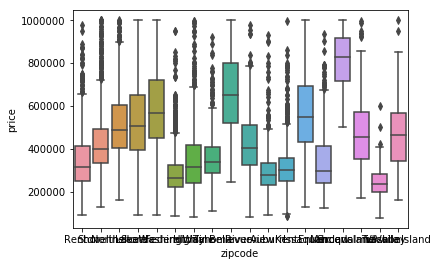

In [24]:
sns.boxplot(x = 'zipcode', y = 'price', data = df)

## One Hot Encode Categorical Variables

In [25]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
ohe = ohc.fit_transform(df.zipcode.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(ohe, columns = ['SD_' + str(ohc.categories_[0][i]) for i in range(len(ohc.categories_[0]))])
dfh = pd.concat([df, dfOneHot], axis = 1)
dfh.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,yrs_old,...,SD_MercerIsland,SD_Northshore,SD_Renton,SD_Riverview,SD_Seattle,SD_Shoreline,SD_SnoqualmieValley,SD_Tahoma,SD_Tukwila,SD_VashonIsland
0,221900.0,3,1.00,1.0,0.0,0.0,3,7,Renton,59,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,538000.0,3,2.25,2.0,0.0,0.0,3,7,Shoreline,63,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,180000.0,2,1.00,1.0,0.0,0.0,3,6,Northshore,82,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1.0,0.0,0.0,5,7,Seattle,49,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3,2.00,1.0,0.0,0.0,3,8,LakeWashington,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
dfh.drop(['zipcode'], axis = 1, inplace = True)

In [28]:
# Save file to continue work in another notebook

dfh.to_csv('kc_house_data.csv', index = False)